In [8]:
# (a) import
library(readr)
library(dplyr)
raw_data <- read.csv("testing_covid.csv")

In [9]:
# (b)
head(raw_data)

# scales and types
# country: qualitative, discrete, nominal
# country_code: qualitative, discrete, nominal
# year_week: quantiative, discrete, intervall
# level: qualitative, discrete, nominal
# region: qualitative, discrete nominal
# region_name: qualitative, discrete nominal
# new_cases: quantitative, discrete, absolute
# tests_done: quantitative, discrete, abosolute
# population: quantitative, discrete, absolute
# testing_rate: quantitative, continious, absolute
# positivity_rate: quantitative, continious, absolute
# testint_data_soiruce: qualitative, discrete, nominal

,X...country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,Austria,AT,2020-W15,national,AT,Austria,1954,12339,8901064,138.6239,15.8359673,Manual webscraping
2,Austria,AT,2020-W16,national,AT,Austria,773,58488,8901064,657.0900,1.3216386,Manual webscraping
3,Austria,AT,2020-W17,national,AT,Austria,479,33443,8901064,375.7191,1.4322878,Manual webscraping
4,Austria,AT,2020-W18,national,AT,Austria,349,26598,8901064,298.8182,1.3121287,Country website
5,Austria,AT,2020-W19,national,AT,Austria,249,42153,8901064,473.5726,0.5907053,Country website
6,Austria,AT,2020-W20,national,AT,Austria,367,46001,8901064,516.8034,0.7978087,Country website


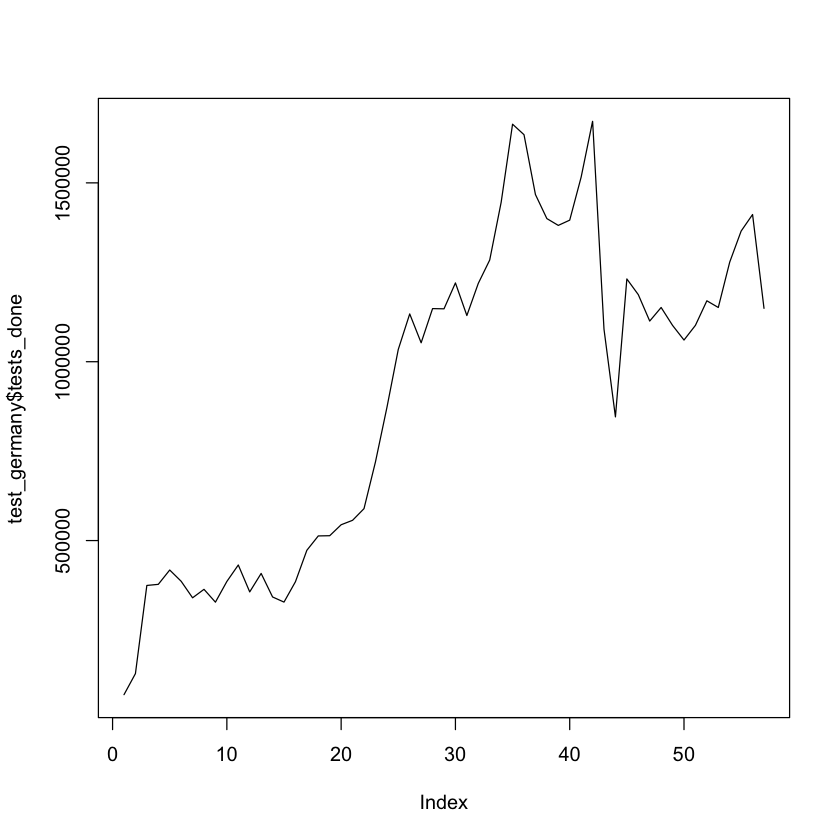

In [10]:
# (c)
test_germany <- raw_data %>%
  filter(country_code == "DE") %>%
  select(year_week, tests_done)
plot(test_germany$tests_done, type = "l")

In [11]:
# raw_data %>% filter(country_code == 'IT') %>%  group_by(level)

country_code,sum_of_tests
<chr>,<int>
AT,1444506
DE,6519962
FR,15876101
IT,10702432


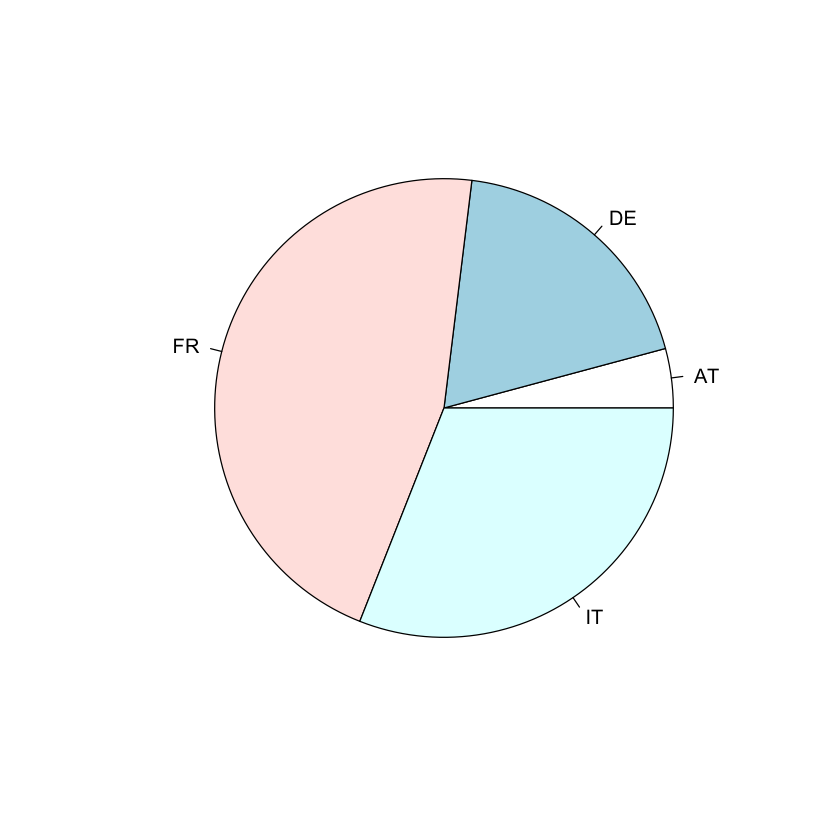

In [12]:
# (d)
sum_of_tests <- raw_data %>%
  filter(country_code %in% c("DE", "AT", "FR", "IT")) %>%
  filter(year_week >= "2020-W49" & year_week <= "2020-W53") %>%
  #filter(level == "national") %>%
  #group_by(level) %>%
  group_by(country_code) %>%
  summarise(sum_of_tests = sum(tests_done))
sum_of_tests

pie(sum_of_tests$sum_of_tests, labels = sum_of_tests$country_code)

country_code,min,max,q1,q2,q3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DE,83.187130,2010.459,502.1793,1311.068,1467.269
FR,4.928683,5265.588,324.5102,1267.803,2826.361


,X...country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,France,FR,2020-W09,national,FR,France,118,3318,67320216,4.928683,3.556359,TESSy
2,France,FR,2020-W10,national,FR,France,996,11101,67320216,16.489846,8.972165,TESSy
3,France,FR,2020-W11,national,FR,France,4297,29623,67320216,44.003127,14.505621,TESSy
4,France,FR,2020-W12,national,FR,France,10595,73235,67320216,108.786044,14.467126,TESSy
5,France,FR,2020-W13,national,FR,France,24156,122870,67320216,182.515754,19.659803,TESSy
6,France,FR,2020-W14,national,FR,France,30304,127029,67320216,188.693690,23.855970,TESSy


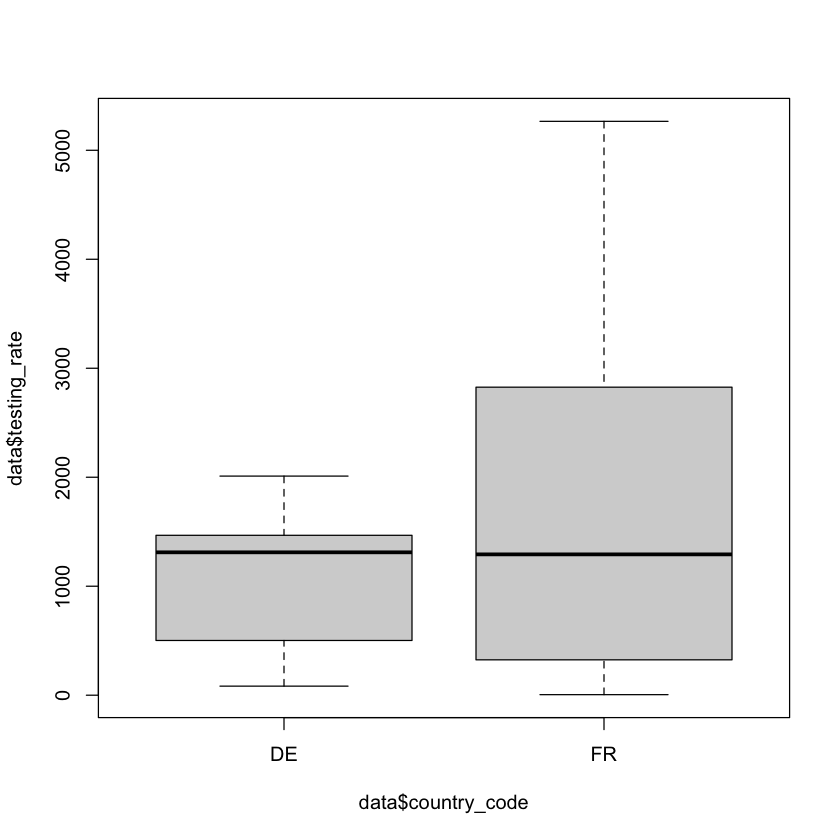

In [13]:
# (e)
# quartiles of testing_rate
measures_testingrate <- raw_data %>%
  filter(country_code %in% c("DE", "FR"), level == "national") %>%
  group_by(country_code) %>%
  summarise(
    min = min(testing_rate),
    max = max(testing_rate),
    q1 = quantile(testing_rate, 0.25, type = 1),
    q2 = quantile(testing_rate, 0.5, type = 1),
    q3 = quantile(testing_rate, 0.75, type = 1)
  )
head(measures_testingrate)

# side by side boxplot
data <- raw_data %>%
  filter(country_code %in% c("DE", "FR"), level == "national")
head(data)

boxplot(data$testing_rate ~ data$country_code)

In [14]:
# # (d)
# sum_of_tests <- raw_data %>%
#   filter(year_week >= "2020-W50") %>%
#   filter(country_code %in% c("DE", "AT", "FR", "IT")) %>%
#   filter(year_week >= "2020-W49" & year_week <= "2020-W53") %>%
#   filter(level == "national") %>%
#   group_by(level) %>%
#   summarise(sum_tests_done = sum(tests_done))
# sum_of_tests$sum_tests_done

In [15]:
# sum_of_tests <- sum_of_tests %>%
#   group_by(country_code) %>%
#   summarise(sum_new_cases = sum(new_cases), sum_tests_done = sum(tests_done))
# sum_of_tests

In [16]:
# Step 1: Sort the data by year and week
sorted_data <- raw_data %>%
  filter(country_code == "DE") %>%
  arrange(year_week)

In [17]:
# Step 2: Assign row numbers as the time variable
sorted_data <- sorted_data %>%
  mutate(time = row_number())

In [18]:
# Step 3: Perform linear regression
lm_model <- lm(tests_done ~ time, data = sorted_data)

In [19]:
# Step 4: Determine regression coefficients
intercept <- coef(lm_model)[1]
slope <- coef(lm_model)[2]
intercept
slope

(Intercept) 
     250383

time 
22557.44

In [23]:
# Step 6: Predict several rows in advance
rows_in_advance <- 7
advance_prediction_data <- data.frame(time = max(sorted_data$time) + 1:max(rows_in_advance))

advance_predicted_tests <- predict(lm_model, newdata = advance_prediction_data)

# Print the predicted tests for each week
for (i in 1:length(advance_predicted_tests)) {
  print(paste("Week", i, "in advance prediction:", advance_predicted_tests[i]))
}

[1] "Week 1 in advance prediction: 1558714.39786967"
[1] "Week 2 in advance prediction: 1581271.83506179"
[1] "Week 3 in advance prediction: 1603829.27225391"
[1] "Week 4 in advance prediction: 1626386.70944603"
[1] "Week 5 in advance prediction: 1648944.14663815"
[1] "Week 6 in advance prediction: 1671501.58383027"
[1] "Week 7 in advance prediction: 1694059.02102238"


In [20]:
# Step 5: Make predictions for week 20 in 2021
week_20_2021 <- data.frame(time = which(sorted_data$year == 2021 & sorted_data$week == 20))
predicted_tests <- predict(lm_model, newdata = week_20_2021)
predicted_tests

numeric(0)

In [21]:
# Step 6: Evaluate the goodness of the linear regression
summary(lm_model)


Call:
lm(formula = tests_done ~ time, data = sorted_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-397181 -167490  -90319  243109  624099 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   250383      67980   3.683 0.000527 ***
time           22557       2039  11.064 1.32e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 253200 on 55 degrees of freedom
Multiple R-squared:   0.69,	Adjusted R-squared:  0.6843 
F-statistic: 122.4 on 1 and 55 DF,  p-value: 1.32e-15


In [22]:
# Regression Coefficients:
# The regression equation for predicting tests_done in Germany is:
# tests_done = 250383 + 22557 * time #nolint
# Here, the intercept (a) is approximately 250383, and the coefficient for time
# (b) is approximately 22557.
#
# Prediction for Week 20 in 2021:
# To make a prediction for week 20 in 2021, we need to substitute the
# corresponding time value into the regression equation. Since time corresponds
# to the row number in the sorted data, we need to find the row number for week
# 20 in 2021. Unfortunately, the specific row number for week 20 in 2021 is not
# provided in the output. We would need to locate this row number in the sorted
# data and use it to predict the tests_done.
#
# Goodness of the Linear Regression:
# The multiple R-squared value is 0.69, indicating that approximately 69% of the
# variance in tests_done can be explained by the linear relationship with time.
# The Adjusted R-squared value, which accounts for the number of predictors in
# the model, is 0.6843. The F-statistic is 122.4 with a p-value of approximately
# 1.32e-15, indicating that the overall regression model is statistically
# significant. Additionally, both the intercept and the coefficient for time are
# statistically significant (p-values < 0.05), suggesting that there is a
# significant linear relationship between time and tests_done in Germany.


Rows: 4919 Columns: 12
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (7): country, country_code, year_week, level, region, region_name, testi...
dbl (5): new_cases, tests_done, population, testing_rate, positivity_rate

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Austria,AT,2020-W15,national,AT,Austria,1954,12339,8901064,138.6239,15.8359673,Manual webscraping
Austria,AT,2020-W16,national,AT,Austria,773,58488,8901064,657.0900,1.3216386,Manual webscraping
Austria,AT,2020-W17,national,AT,Austria,479,33443,8901064,375.7191,1.4322878,Manual webscraping
Austria,AT,2020-W18,national,AT,Austria,349,26598,8901064,298.8182,1.3121287,Country website
Austria,AT,2020-W19,national,AT,Austria,249,42153,8901064,473.5726,0.5907053,Country website
Austria,AT,2020-W20,national,AT,Austria,367,46001,8901064,516.8034,0.7978087,Country website
Austria,AT,2020-W21,national,AT,Austria,285,39348,8901064,442.0595,0.7243062,Country website
Austria,AT,2020-W22,national,AT,Austria,203,46677,8901064,524.3980,0.4349037,Country website
Austria,AT,2020-W23,national,AT,Austria,226,41063,8901064,461.3269,0.5503738,Country website


country,country_code,year_week,level,region,region_name,new_cases
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Austria,AT,2020-W15,national,AT,Austria,1954
Austria,AT,2020-W16,national,AT,Austria,773
Austria,AT,2020-W17,national,AT,Austria,479
Austria,AT,2020-W18,national,AT,Austria,349
Austria,AT,2020-W19,national,AT,Austria,249
Austria,AT,2020-W20,national,AT,Austria,367
Austria,AT,2020-W21,national,AT,Austria,285
Austria,AT,2020-W22,national,AT,Austria,203
Austria,AT,2020-W23,national,AT,Austria,226


tests_done,population,testing_rate,positivity_rate,testing_data_source
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
12339,8901064,138.6239,15.8359673,Manual webscraping
58488,8901064,657.0900,1.3216386,Manual webscraping
33443,8901064,375.7191,1.4322878,Manual webscraping
26598,8901064,298.8182,1.3121287,Country website
42153,8901064,473.5726,0.5907053,Country website
46001,8901064,516.8034,0.7978087,Country website
39348,8901064,442.0595,0.7243062,Country website
46677,8901064,524.3980,0.4349037,Country website
41063,8901064,461.3269,0.5503738,Country website


[1] 0.1583597

country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Austria,AT,202015,national,AT,Austria,1954,12339,8901064,138.6239,15.8359673,Manual webscraping
Austria,AT,202016,national,AT,Austria,773,58488,8901064,657.0900,1.3216386,Manual webscraping
Austria,AT,202017,national,AT,Austria,479,33443,8901064,375.7191,1.4322878,Manual webscraping
Austria,AT,202018,national,AT,Austria,349,26598,8901064,298.8182,1.3121287,Country website
Austria,AT,202019,national,AT,Austria,249,42153,8901064,473.5726,0.5907053,Country website
Austria,AT,202020,national,AT,Austria,367,46001,8901064,516.8034,0.7978087,Country website


country,year_week,tests_done
<chr>,<chr>,<dbl>
Germany,202010,69184
Germany,202011,128008
Germany,202012,374534
Germany,202013,377599
Germany,202014,417646
Germany,202015,386241


# A tibble: 29 x 1
   country    
   <chr>      
 1 Austria    
 2 Belgium    
 3 Bulgaria   
 4 Croatia    
 5 Cyprus     
 6 Czechia    
 7 Denmark    
 8 Estonia    
 9 Finland    
10 France     
11 Germany    
12 Greece     
13 Hungary    
14 Iceland    
15 Ireland    
16 Italy      
17 Latvia     
18 Lithuania  
19 Luxembourg 
20 Malta      
21 Netherlands
22 Norway     
23 Poland     
24 Portugal   
25 Romania    
26 Slovakia   
27 Slovenia   
28 Spain      
29 Sweden     


country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Austria,AT,202015,national,AT,Austria,1954,12339,8901064,138.6239,15.8359673,Manual webscraping
Austria,AT,202016,national,AT,Austria,773,58488,8901064,657.0900,1.3216386,Manual webscraping
Austria,AT,202017,national,AT,Austria,479,33443,8901064,375.7191,1.4322878,Manual webscraping
Austria,AT,202018,national,AT,Austria,349,26598,8901064,298.8182,1.3121287,Country website
Austria,AT,202019,national,AT,Austria,249,42153,8901064,473.5726,0.5907053,Country website
Austria,AT,202020,national,AT,Austria,367,46001,8901064,516.8034,0.7978087,Country website


ERROR: [1m[33mError[39m in `filter()`:[22m
[1m[22m[36mi[39m In argument: `between(year_week, 202048, 202052)`.
[1mCaused by error in `between()`:[22m
[33m![39m Can't combine `x` <character> and `left` <double>.


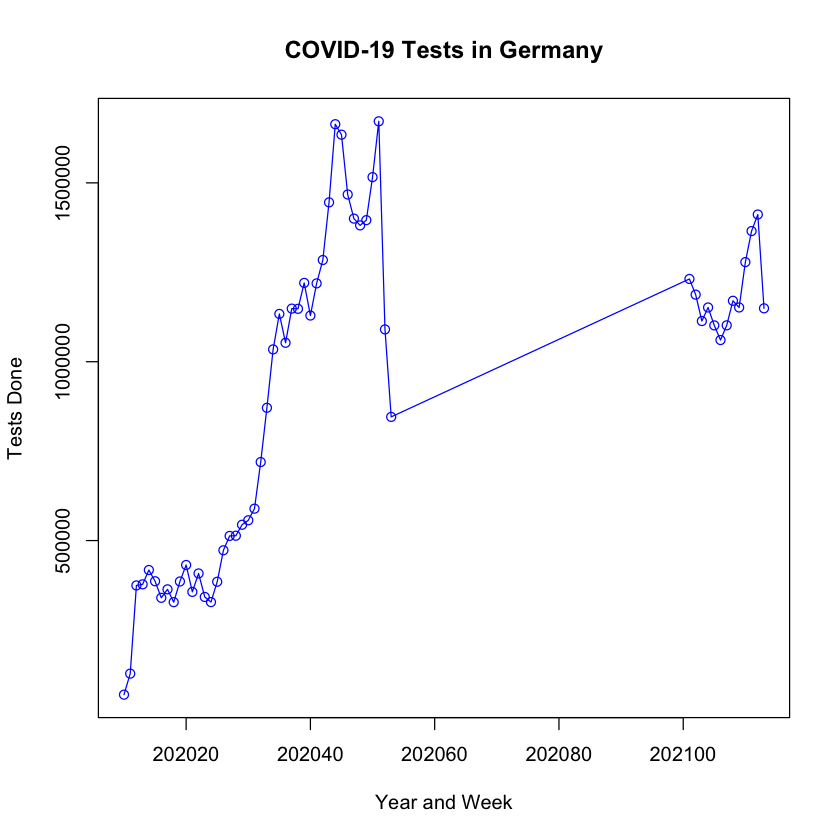

In [25]:
library (tidyverse)

# 1
raw_data <- read_csv("testing_covid.csv")
raw_data

raw_data %>% select(1:7)
raw_data %>% select(8:12)
1954/12339

# 2
# country: quali, nomi, disc
# country_code: quali, nomi, disc
# year_week: quali, ordinal, disc
# level: quali, nomi, disc
# region: quali, nomi, disc
# region_name: quali, nomi, disc
# new_cases: quanti, ratio, conti
# tests_done: quanti, ratio, conti
# population: quanti, ratio, conti
# testing_rate: quanti, ratio, conti
# positivity_rate: quanti, ratio, conti
# testing_data_source: quali, nomi, disc

# 3
# make year_week numeric
data_numeric <- raw_data %>% 
  mutate (year_week = str_remove(year_week, "-W"))
head(data_numeric)

germany_data <- data_numeric %>% filter(country == "Germany") %>% select(country, year_week, tests_done)
head(germany_data)
plot(germany_data$year_week, 
     germany_data$tests_done, 
     type = "o",  # Verwenden von 'o' für Punkte verbunden mit Linien
     main = "COVID-19 Tests in Germany", 
     xlab = "Year and Week", 
     ylab = "Tests Done",
     col = "blue") 

# 4
# Dec 2020: KW48-52
data_numeric %>% select(country) %>% unique() %>% print(n = 100)
head(data_numeric)
pie <- data_numeric %>% filter(
  country %in% c("Germany", "Austria", "France", "Italy"), 
  between(year_week, 202048, 202052)
  ) %>% group_by(country) %>% summarise(
    sum_of_tests = sum(tests_done),
    sum_of_new_cases = sum(new_cases),
    positivity_rate = sum_of_new_cases/sum_of_tests
)
pie
pie(pie$positivity_rate, labels = pie$country)

# 5
boxplot_data <- raw_data %>% filter(country %in% c("Germany", "France"))
boxplot_data %>% group_by(country) %>% summarise(
  min = min(testing_rate),
  max = max(testing_rate),
  q1 = quantile(testing_rate, probs = 0.25),
  q2 = quantile(testing_rate, probs = 0.5),
  q3 = quantile(testing_rate, probs = 0.75)
)
boxplot(boxplot_data$testing_rate ~ boxplot_data$country)

In [26]:

# 6
regression_data <- raw_data %>% filter(country == "Germany") %>% 
  arrange(year_week) %>% mutate(nr = row_number())
regression_data
modell <- lm(regression_data$tests_done ~ regression_data$nr)
a <- modell$coefficients[1];a
b <- modell$coefficients[2];b

time <- 202120
y <- a + b * time;y

# 7 
# a) tidy data:
# each variable forms a column
# each observation forms a row
# each type of obs. unit forms a table
# b)
data <- raw_data %>% select(country, year_week, tests_done);data

country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source,nr
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
Germany,DE,2020-W10,national,DE,Germany,773,69184,83166711,83.18713,1.1173104,TESSy,1
Germany,DE,2020-W11,national,DE,Germany,3936,128008,83166711,153.91735,3.0748078,TESSy,2
Germany,DE,2020-W12,national,DE,Germany,19936,374534,83166711,450.34124,5.3228812,TESSy,3
Germany,DE,2020-W13,national,DE,Germany,32524,377599,83166711,454.02661,8.6133703,TESSy,4
Germany,DE,2020-W14,national,DE,Germany,38093,417646,83166711,502.17929,9.1208823,TESSy,5
Germany,DE,2020-W15,national,DE,Germany,27625,386241,83166711,464.41779,7.1522702,TESSy,6
Germany,DE,2020-W16,national,DE,Germany,18656,339983,83166711,408.79698,5.4873332,TESSy,7
Germany,DE,2020-W17,national,DE,Germany,13521,363659,83166711,437.26510,3.7180436,TESSy,8
Germany,DE,2020-W18,national,DE,Germany,7982,327799,83166711,394.14688,2.4350288,TESSy,9


(Intercept) 
     250383

regression_data$nr 
          22557.44

(Intercept) 
 4559559588

country,year_week,tests_done
<chr>,<chr>,<dbl>
Austria,2020-W15,12339
Austria,2020-W16,58488
Austria,2020-W17,33443
Austria,2020-W18,26598
Austria,2020-W19,42153
Austria,2020-W20,46001
Austria,2020-W21,39348
Austria,2020-W22,46677
Austria,2020-W23,41063
